# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023
...,...
2023-09-30,170.984741
2023-10-31,170.545319
2023-11-30,189.949997


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [4]:
df['Diff'] = df['Adj Close'].diff().shift(-1)
df['Target'] = np.sign(df['Diff'])
df['Premium'] = 0.08 * df['Adj Close']
df

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842
...,...,...,...,...
2023-09-30,170.984741,-0.439423,-1.0,13.678779
2023-10-31,170.545319,19.404678,1.0,13.643625
2023-11-30,189.949997,2.580002,1.0,15.196000


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [6]:
X = pd.read_csv("W2_Xdata.csv", 
                index_col="Date", 
                parse_dates=["Date"])

In [7]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:'2023-09-30', :].copy()

In [8]:
# Fit a log regression
logreg = LogisticRegression().fit(X, y)

# 4.) Add columns, prediction and profits.

In [9]:
y_pred = logreg.predict(X)
df['Predictions'] = y_pred
df['Profits'] = 0.

In [10]:
# True Positive Profits
df.loc[(df['Target'] == 1) & (df['Predictions'] == 1), 'Profits'] = df['Premium']

#False Positive
df.loc[(df['Target'] == -1) & (df['Predictions'] == 1), 'Profits'] = -100 * df['Premium']
df.head()

,Adj Close,Diff,Target,Premium,Predictions,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842


# 5.) Plot profits over time

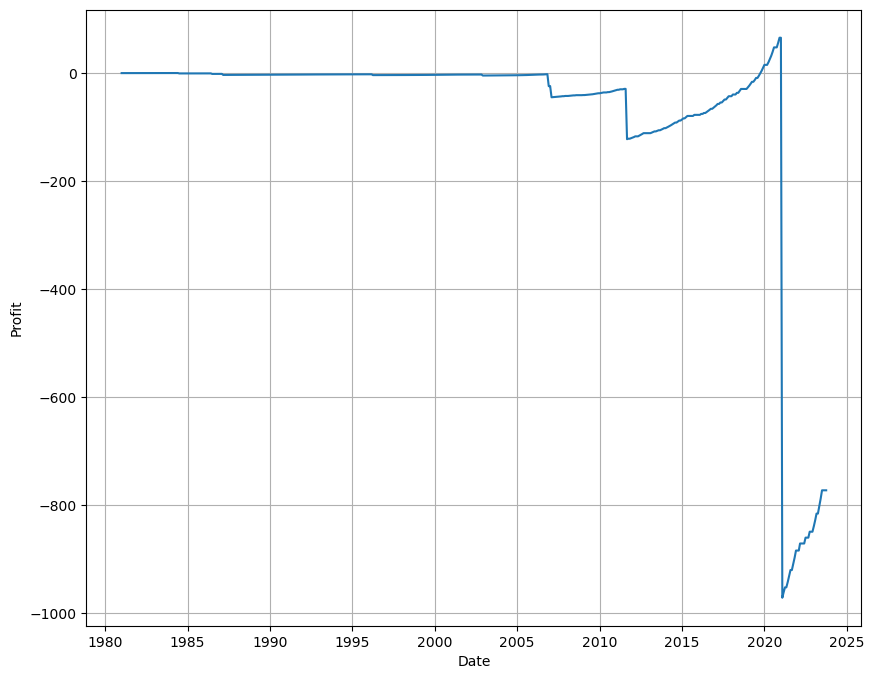

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(df['Profits']))
plt.grid()
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

## 5.1 5.5) Short write up about how you see your skills valuable to PJ and/or Philip Liu


My knowledge in financial accounting as well as data modeling could contribute to the development of the platform and provide asistance to the strategic transformation of the media brands of Arena.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.